## Importar librerias

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import inspect
import re
import seaborn as sns
import numpy as np

## Cargar datos

In [2]:
df = pd.read_csv('listingss.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [3]:
count_rows = df.id.count()
print(f'Numero de registros raw data: {count_rows}')

Numero de registros raw data: 69351


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

## Preprocesamiento

In [5]:
def graph_duplicates_evaluation(df):

    duplicated = df.duplicated()

    percent_unduplicated = len(df[~duplicated]) / len(df) * 100
    porcentaje_duplicated = len(df[duplicated]) / len(df) * 100

    colors = ['slategray', 'black']
    plt.bar(['unique', 'duplicated'], [len(df[~duplicated]), len(df[duplicated])], color=colors)
    plt.ylabel('# rows')

    frame = inspect.currentframe()
    caller_locals = frame.f_back.f_locals
    variable_name = next(name for name, value in caller_locals.items() if value is df)
    variable_name_str = str(variable_name)
    plt.title(f'Data duplicated relation in dataframe')

    plt.text(0, len(df[~duplicated]), f'{percent_unduplicated:.2f}%', ha='center', va='bottom')
    plt.text(1, len(df[duplicated]), f'{porcentaje_duplicated:.2f}%', ha='center', va='bottom')

    return plt.show()

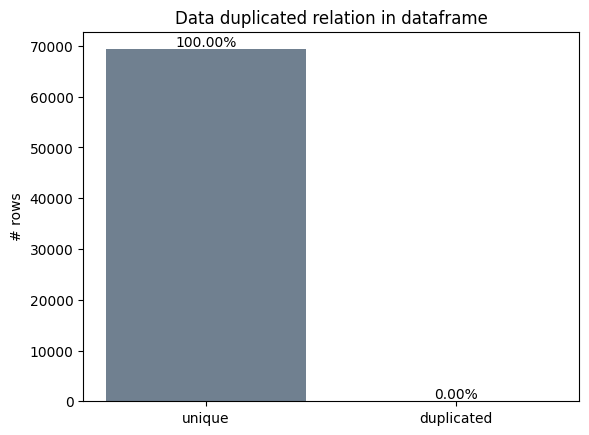

In [6]:
graph_duplicates_evaluation(df)

In [7]:
def graph_percentage_nulls(df):

    percentage_nulls = df.isnull().sum() / df.shape[0] * 100

    plt.barh(percentage_nulls.index, percentage_nulls, color = 'slategray')
    plt.ylabel('variables')
    plt.xlabel('% nulls')
    plt.title('% nulls per var')
    plt.xticks(rotation=0)

    return plt.show()

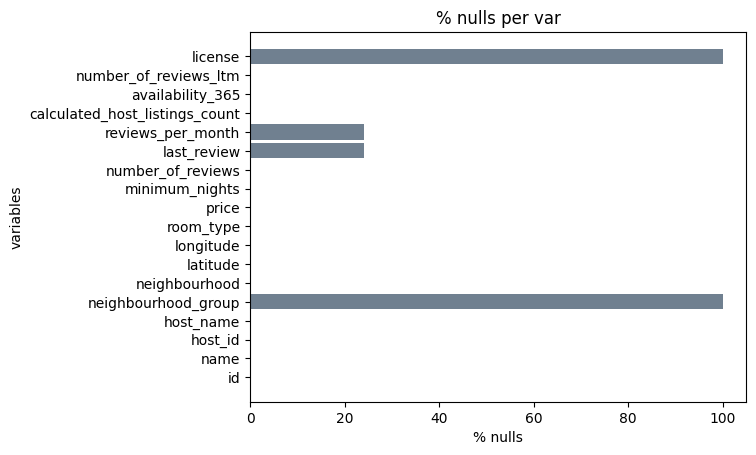

In [8]:
graph_percentage_nulls(df)

In [9]:
delete_columns = ['neighbourhood_group', 'license', 'host_name','name']
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.drop(columns=delete_columns, inplace=True)
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,264345,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0
1,13913,54730,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9
2,284532,1481412,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1
3,107048,259088,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20
4,284603,1481851,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2


In [10]:
df['last_review'] = pd.to_datetime(df['last_review'])
max_review_date = df['last_review'].max()
min_review_date = df['last_review'].min()

print(f" El rango de reviews esta entre {min_review_date} y {max_review_date}")

 El rango de reviews esta entre 2011-07-02 00:00:00 y 2022-09-11 00:00:00


In [11]:
df.dtypes

id                                         int64
host_id                                    int64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

###  **Diagnostico y procesamiento**

* No hay registros duplicados
* La columnas license y neighbourdhood estan vacias, se eliminan.
* Casi el 25% de los datos para las columnas reviews_per_month y last_review estan vacios. ¿Que hacer con estos datos? Pues bien, estuve revisando y estan vacios porque no han tenido nunca un review. Por lo tanto voy a llenar estos valores con 0
* Elimino las variables categoricas que representen nombres y de las cuales tengo el ID. Para el efecto del modelado, hacen ruido.
* En el scope de este proyecto no esta la visualización de datos ni representación grafica, entonces no seran de mucha ayuda las coordenadas.
* Cambiar el tipo de dato de review_date a datetime
* El rango de reviews esta entre 2011-07-02 00:00:00 y 2022-09-11 00:00:00. Con esto, podemos inferir que tenemos un timeframe de 11 años.
* El set de datos tiene 33 barios diferentes y 4 tipos de habitaciones

<br>

**Diccionario de datos:**
Algunas columna del dataset no son claras desde su nombre para la interpretacion, voy a definir como se van a interpretar:

* **calculated_host_listings_count:** número total de propiedades o anuncios que un anfitrión tiene en Airbnb
* **availability_365:** disponibilidad de una propiedad de Airbnb a lo largo de un año. Es una columna que indica el número de días que una propiedad está disponible para ser reservada durante el transcurso de 365 días
* **number_of_reviews_ltm:** número de reseñas que una propiedad de Airbnb ha recibido en los ultimo doce meses( ltm: last twelve months)

## Analisis Exploratorio de datos

In [12]:
df.to_csv('processed_data.csv')

In [12]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,264345,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0
1,13913,54730,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9
2,284532,1481412,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1
3,107048,259088,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20
4,284603,1481851,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2


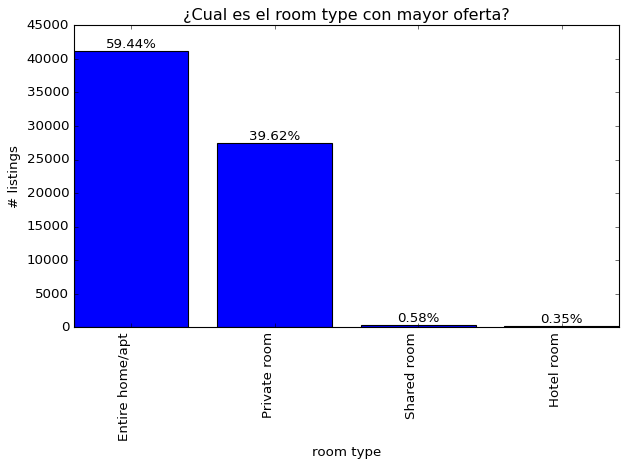

In [13]:
conteo_room_type = df.room_type.value_counts()

# Configurar el estilo del gráfico
plt.style.use('classic')
plt.figure(facecolor='white')
# Crear el gráfico de barras
plt.bar(conteo_room_type.index, conteo_room_type.values)
# Personalizar el gráfico
plt.title('¿Cual es el room type con mayor oferta?')
plt.xlabel('room type')
plt.ylabel('# listings')
plt.xticks(rotation=90, ha='right')
# Agregar porcentaje encima de cada barra
total_listings = len(df)
for i, value in enumerate(conteo_room_type.values):
    percentage = (value / total_listings) * 100
    plt.text(i, value, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

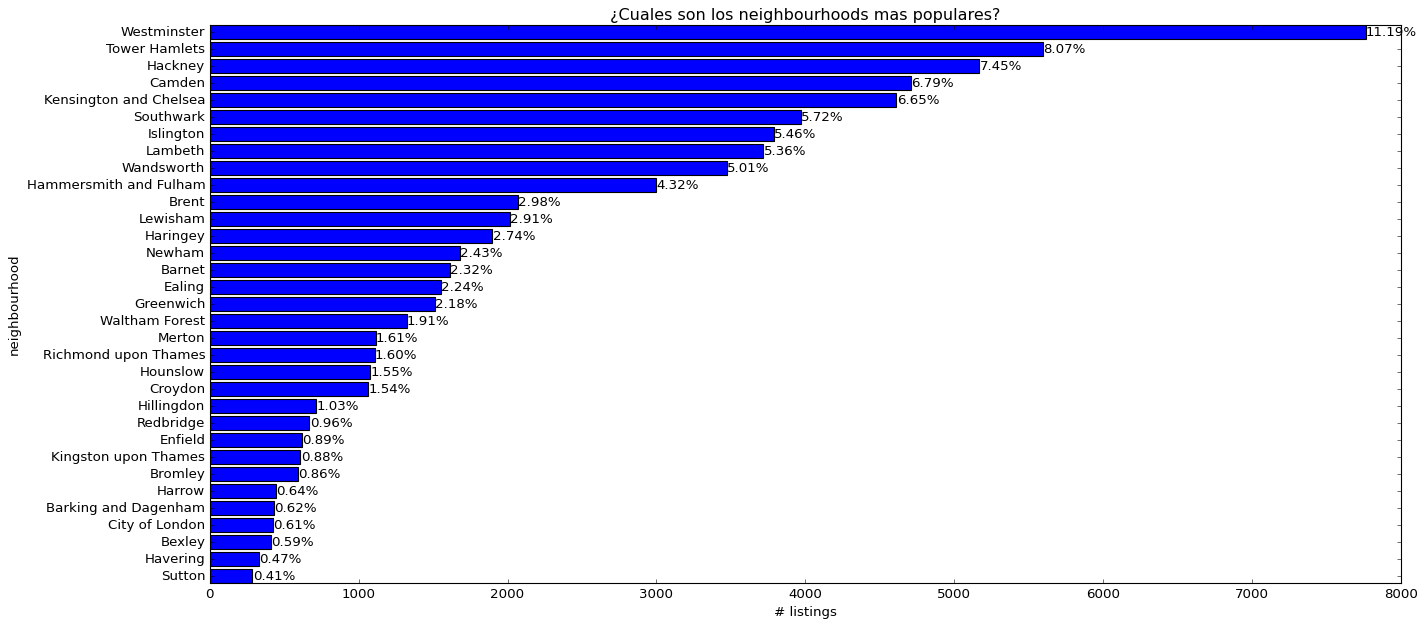

In [14]:
conteo_neighbourhood = df['neighbourhood'].value_counts()
conteo_neighbourhood = conteo_neighbourhood.sort_values(ascending=True)

# Configurar el estilo del gráfico
plt.style.use('classic')
plt.figure(figsize=(18, 8), facecolor='white')
# Crear el gráfico de barras
plt.barh(conteo_neighbourhood.index, conteo_neighbourhood.values, height=0.8)  # Aumentar el tamaño de la altura de las barras
# Personalizar el gráfico
plt.title('¿Cuales son los neighbourhoods mas populares?')
plt.xlabel('# listings')
plt.ylabel('neighbourhood')
# Añadir el porcentaje dentro de cada barra con separación ajustada
for i, value in enumerate(conteo_neighbourhood.values):
    percentage = (value / len(df)) * 100
    plt.text(value + 2, i, f'{percentage:.2f}%', va='center')

plt.tight_layout()
plt.show()

### **Analisis estadistico variables numericas**

In [15]:
numeric_col = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm', 'latitude', 'longitude']

df_numeric_describe = df[numeric_col].describe().T
df_numeric_describe

,count,mean,std,min,25%,50%,75%,max
price,69351.0,177.208822,412.823024,0.00000,55.00000,100.0000,180.00000,25000.00000
minimum_nights,69351.0,5.997505,25.709514,1.00000,1.00000,2.0000,4.00000,1125.00000
number_of_reviews,69351.0,17.537051,40.410763,0.00000,1.00000,4.0000,16.00000,1141.00000
reviews_per_month,69351.0,0.669043,1.172270,0.00000,0.01000,0.2000,0.85000,51.33000
calculated_host_listings_count,69351.0,11.987498,37.148839,1.00000,1.00000,1.0000,4.00000,285.00000
availability_365,69351.0,108.520266,132.821088,0.00000,0.00000,32.0000,228.00000,365.00000
number_of_reviews_ltm,69351.0,4.734438,12.032502,0.00000,0.00000,0.0000,5.00000,660.00000
latitude,69351.0,51.509544,0.049182,51.27248,51.48314,51.5136,51.53971,51.70893
longitude,69351.0,-0.128489,0.100957,-0.52360,-0.18952,-0.1262,-0.06855,0.30515




* La desviación estandar en el price, es muy grande por la variabilidad de los datos. Es decir, hay listings que tienen precios muy elevados y afectan la distribución. Vamos a tomar la mediana como una medida de referencia, en este caso, ***la mediana del price es 100***
* La mayoría de las estancias mínimas están entre 1 y 4 noches. Esta columna tambien esta afectada por los maximos, por esto tomare como medida de referencia la mediana: 2 noches minimo
* La columna de cantidad de reseñas tiene un rango amplio, desde 0 hasta 1141 reseñas. La media (17.54) está por encima de la mediana (4.0), lo que sugiere una distribución sesgada hacia la derecha. **La mayoría de las propiedades tienen un número relativamente bajo de reseñas**
* Consecuente con el analisis anterior, la mayoría de las propiedades reciben pocas reseñas por mes y han tenido pocas reseñas en el ultimo mes
* La media (11.99) y la mediana (1.0) están distantes en la columna calculated_host_listings_count, lo que sugiere una distribución sesgada hacia la derecha. **La mayoría de los anfitriones tienen relativamente pocos anuncios.**
* La mayoría de las propiedades tienen una disponibilidad relativamente alta a lo largo del año

In [16]:
df_numeric_columns = df[numeric_col]
df_numeric_columns

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,latitude,longitude
0,55,3,65,0.47,1,74,0,51.52874,-0.05396
1,50,1,30,0.20,2,343,9,51.56861,-0.11270
2,90,5,42,0.34,1,222,1,51.52851,-0.07426
3,180,4,493,3.59,5,236,20,51.52478,-0.10484
4,297,14,6,0.05,1,180,2,51.51464,-0.20004
...,...,...,...,...,...,...,...,...,...
69346,55,5,67,0.84,3,0,1,51.48300,-0.01346
69347,201,3,61,0.99,1,0,12,51.50914,-0.10192
69348,246,3,6,1.49,1,4,6,51.40571,-0.35325
69349,250,3,9,0.61,1,2,4,51.41029,-0.35975


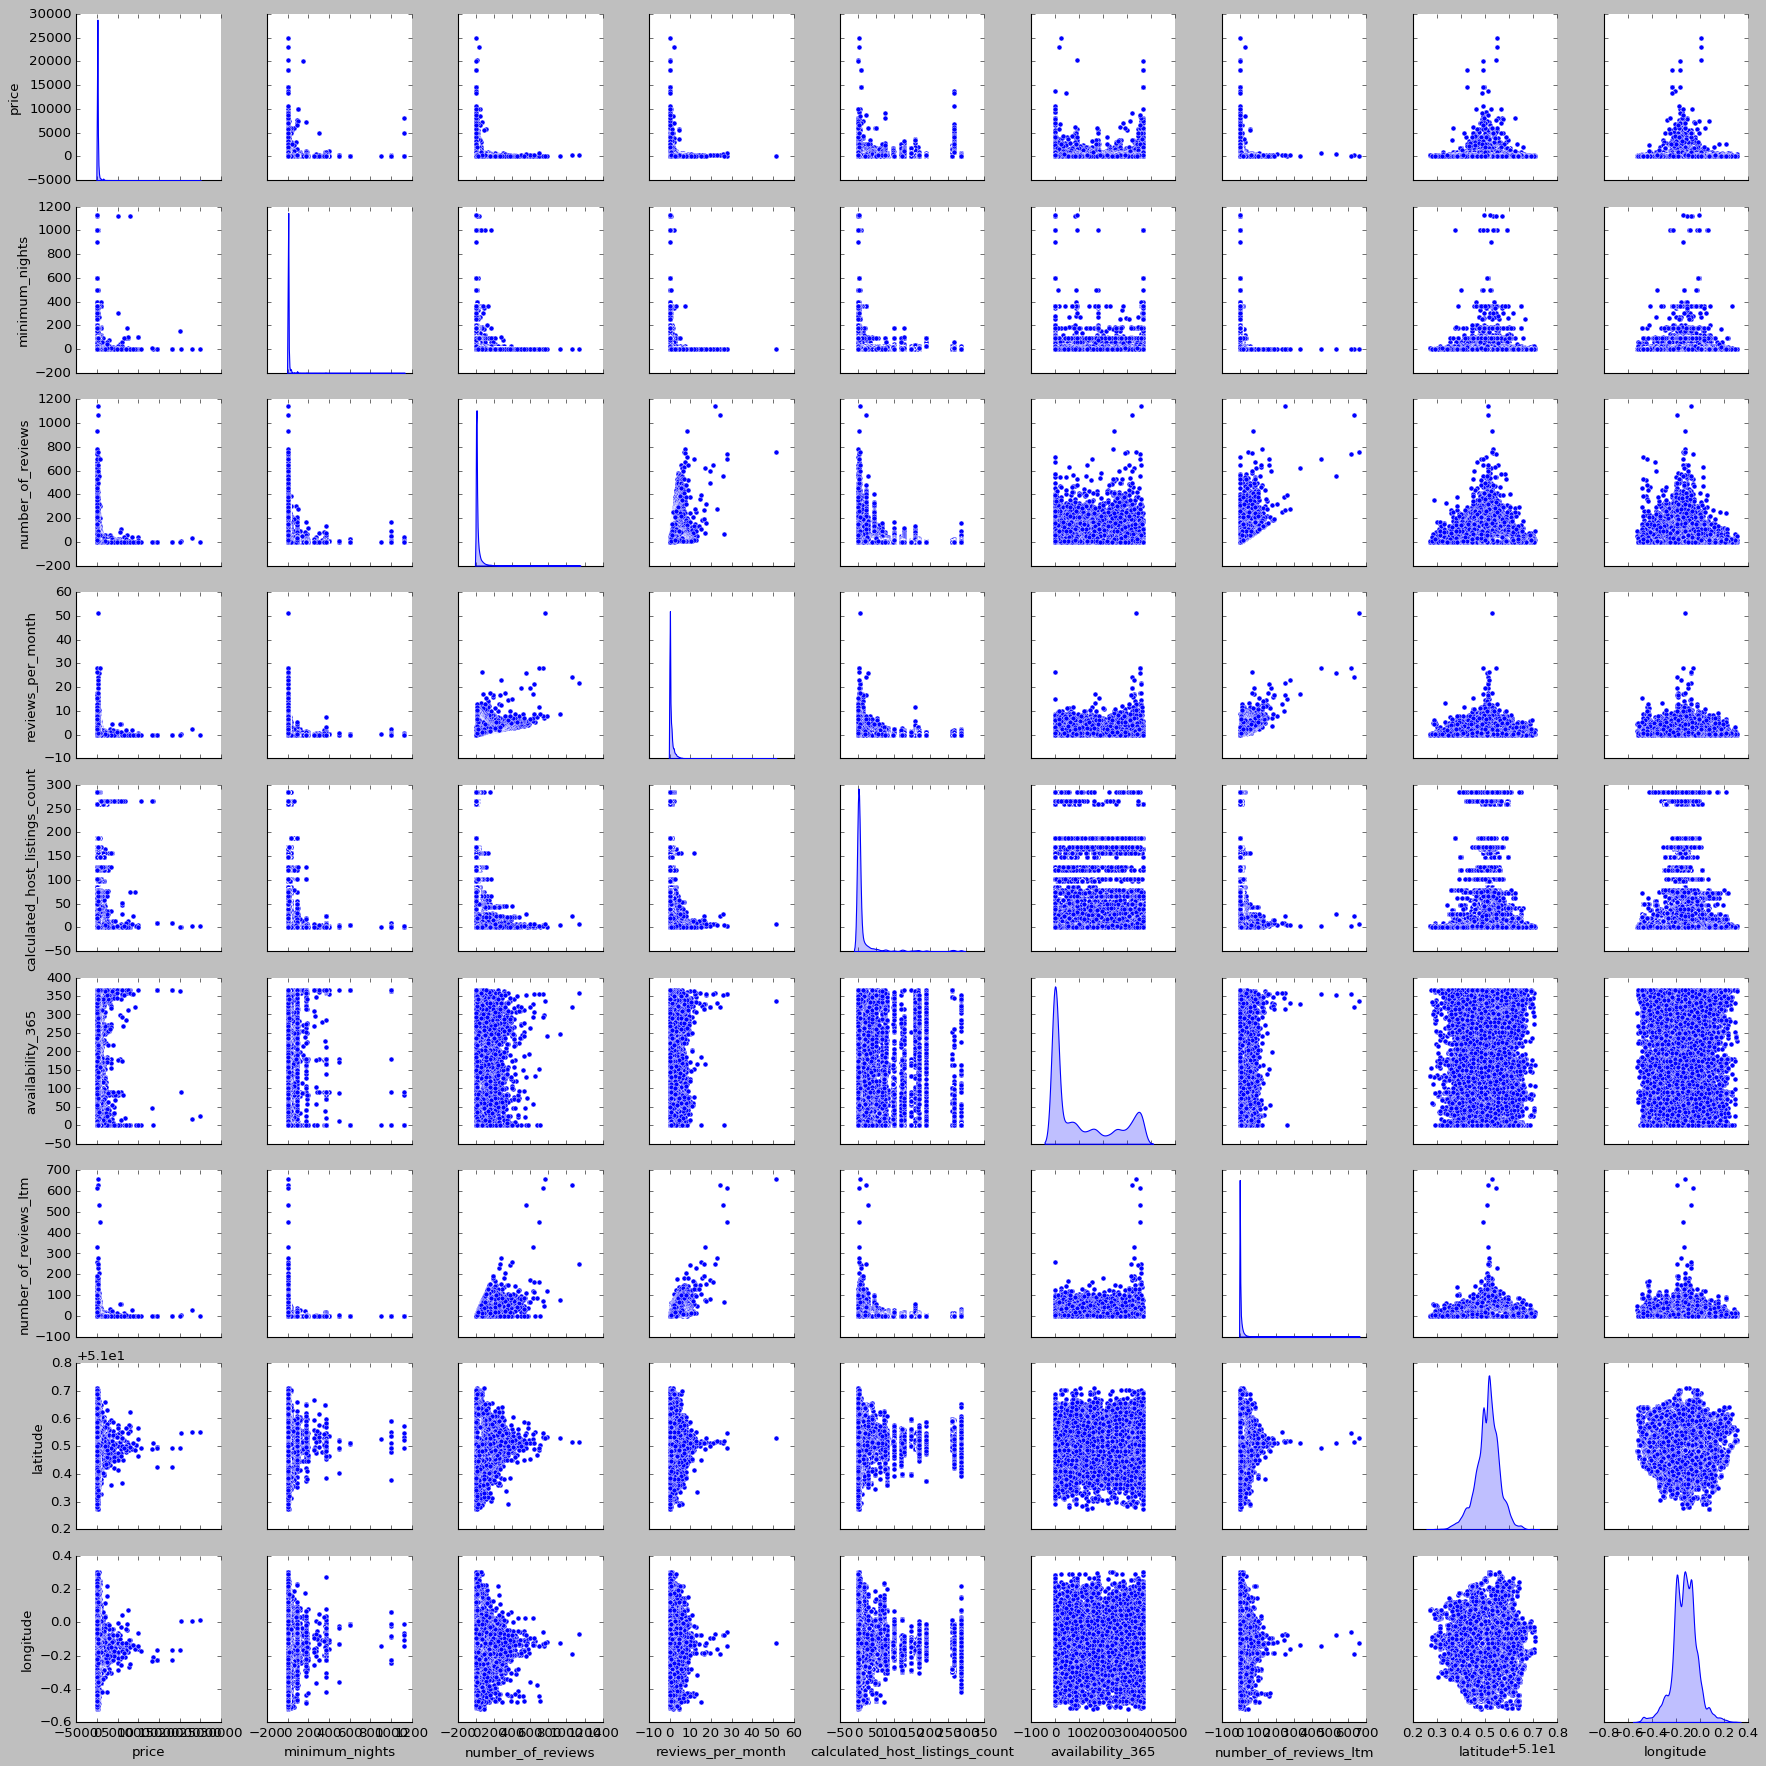

In [17]:
sns.pairplot(df_numeric_columns, diag_kind="kde")
plt.show()

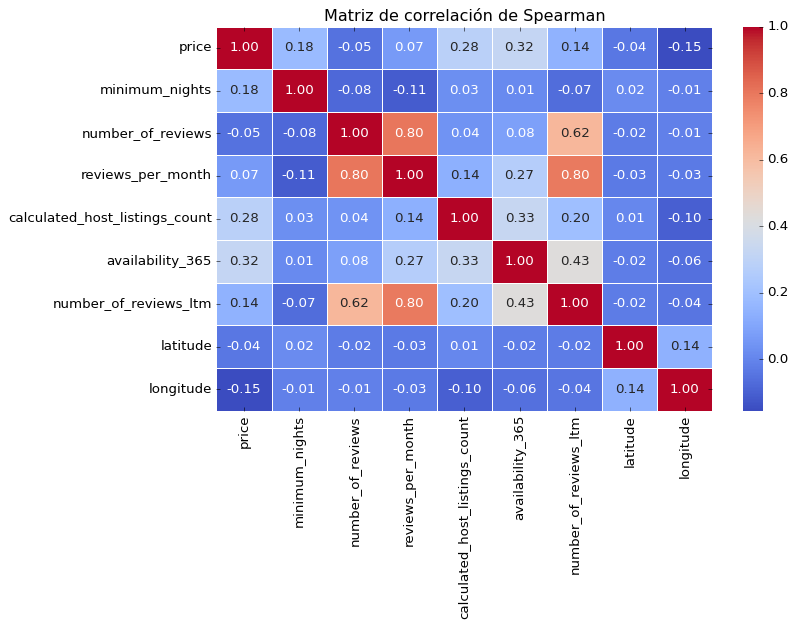

In [29]:
corr_spearman = df_numeric_columns.corr(method='spearman')
plt.figure(figsize=(10, 6), facecolor='white')
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de correlación de Spearman')
plt.show()

### **Analisis de la variable objetivo y sus correlaciones**

<Figure size 640x480 with 0 Axes>

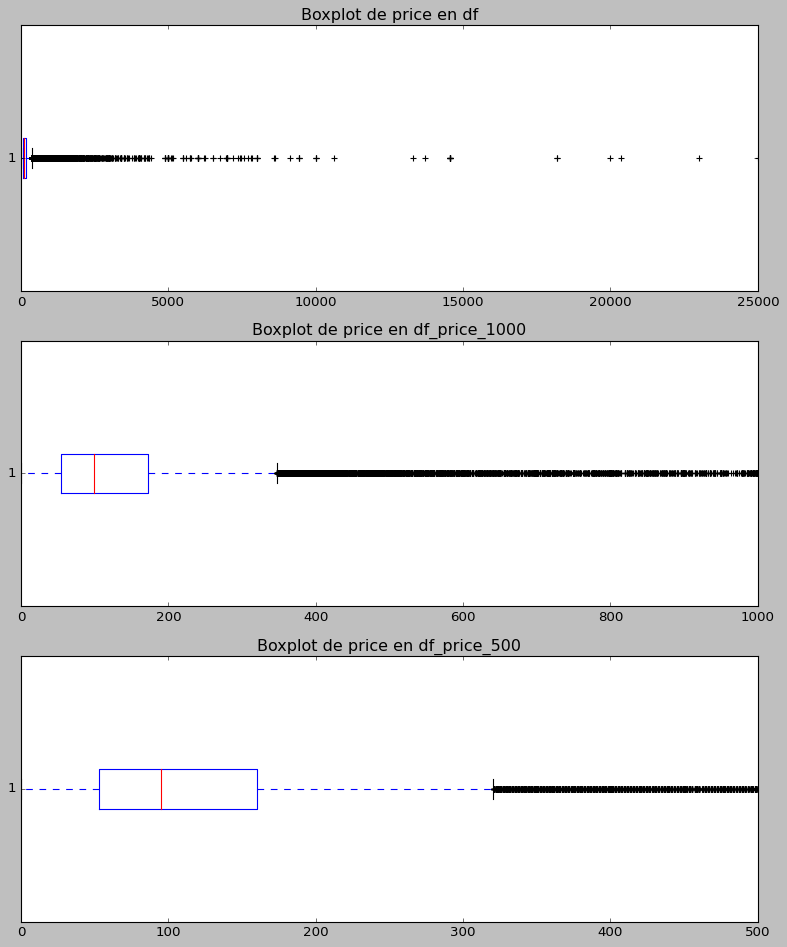

In [37]:
# Dataframes filtrados por price
df_price_1000 = df[df['price'] < 1000]
df_price_500 = df[df['price'] < 500]

# Configurar el estilo del gráfico
plt.style.use('classic')
plt.figure(facecolor='white')
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Crear los boxplots en cada subgráfico
axes[0].boxplot(df['price'], vert=False)
axes[0].set_title('Boxplot de price en df')

axes[1].boxplot(df_price_1000['price'], vert=False)
axes[1].set_title('Boxplot de price en df_price_1000')

axes[2].boxplot(df_price_500['price'], vert=False)
axes[2].set_title('Boxplot de price en df_price_500')


plt.tight_layout()
plt.show()

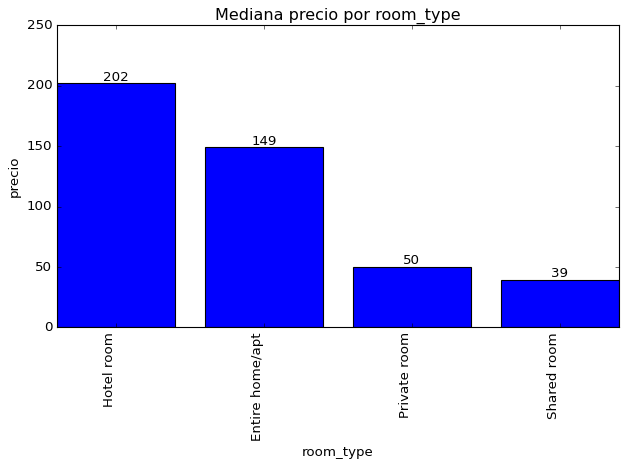

In [163]:
median_price_by_room_type = df.pivot_table(values='price',index='room_type',aggfunc='median',fill_value=0).sort_values(by='price', ascending=False).reset_index()

plt.style.use('classic')
plt.figure(facecolor='white')
# Crear el gráfico de barras
plt.bar(median_price_by_room_type['room_type'], median_price_by_room_type['price'])

# Personalizar el gráfico
plt.title('Mediana precio por room_type')
plt.xlabel('room_type')
plt.ylabel('precio')
plt.xticks(rotation=90, ha='right')

for i, value in enumerate(median_price_by_room_type['price']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

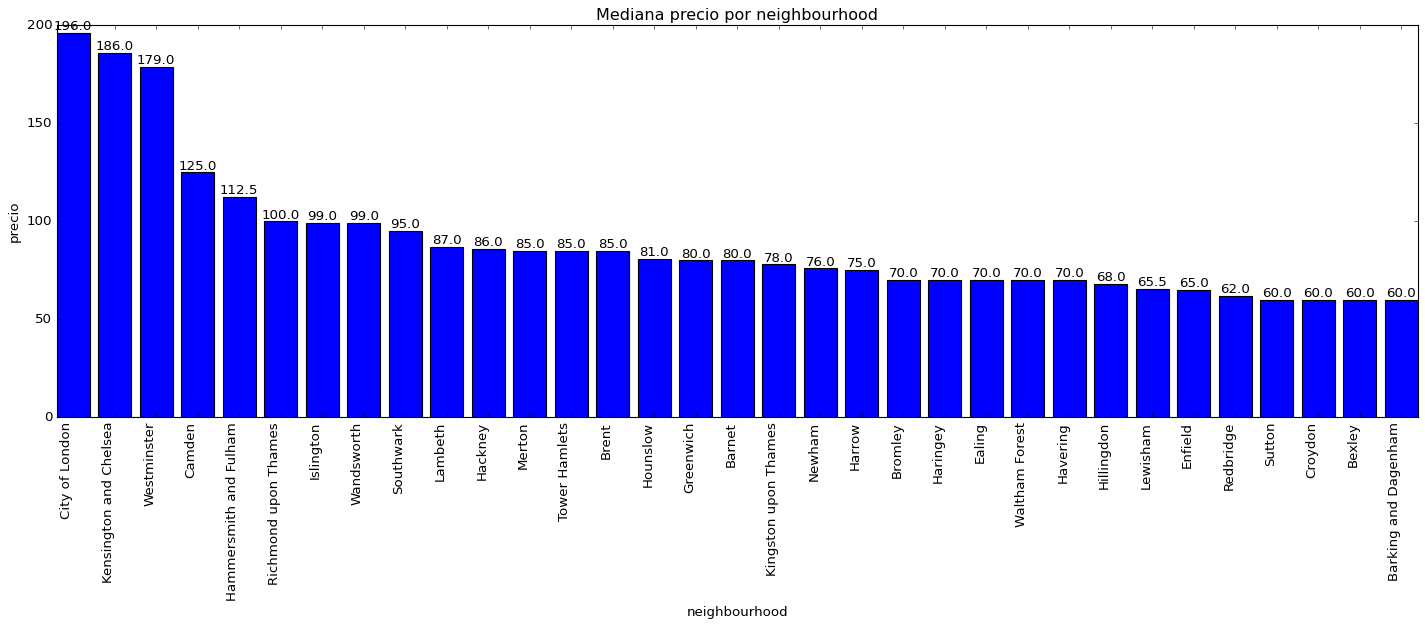

In [171]:
median_price_by_neighbourhood = df.pivot_table(index='neighbourhood',values='price',aggfunc='median',fill_value=0).sort_values(by='price', ascending=False).reset_index()

plt.style.use('classic')
plt.figure(figsize=(18, 8), facecolor='white')
# Crear el gráfico de barras
plt.bar(median_price_by_neighbourhood['neighbourhood'], median_price_by_neighbourhood['price'])

# Personalizar el gráfico
plt.title('Mediana precio por neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('precio')
plt.xticks(rotation=90, ha='right')

for i, value in enumerate(median_price_by_neighbourhood['price']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()




## Hallazgos

* El tipo de habitación con mas oferta es **Entire home/apt**
* Los barrios mas populares se encuentran en el centro de Londres. El barrio que mas tiene oferta de rooms es Westminster con un 11,9 % del total de listings. En esta [web](http://insideairbnb.com/london) se puede visualizar los barrios de Londres
* La mayoria de los datos no presenta relaciones lineales y su distribución es no normal. Tambien se identifican outliers. Por lo tanto voy a hacer una evaluación de la correlacion entre variables usando el **metodo spearman**
* Hay una fuerte correlacion(0.8) entre las columnas reviews_per_month y numbers_of_review. Tambien con number_of_reviews_ltm, por esto se eliminan las dos primeras junto con last_review
* El precio esta relacionado con el tipo de habitacion ya que la mediana varia en orden descendente: hotel room , entire home/apt, private room, shared room. Aca tambien es interesante relacionar que hay menor oferta de las que estan en los extremos hotel room y shared room.
* El precio tambien esta relacionado con el barrio. En este caso los tres barrios mas centrales son los que tienen el precio mas elevado
* Analizando la distribución del precio se evidencia que el 75% de los valores son menores a 180. El ultimo cuartil tiene valores muy desproporcionados que pueden afectar el performance del modelo, por esta razon inicialmente se seleccionara los listing con price < 1000

In [40]:
df_price_1000.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,264345,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0
1,13913,54730,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9
2,284532,1481412,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1
3,107048,259088,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20
4,284603,1481851,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2


## Output

In [42]:
# Se realizan las transaformaciones para tener el dataset con la data para ingresar al modelo
df_processed = df_price_1000.copy()
df_processed = df_processed.drop(columns = ['host_id', 'number_of_reviews', 'last_review', 'reviews_per_month'])
df_processed.to_csv('processed_data_listings.csv', index=False)